Data inspection
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 

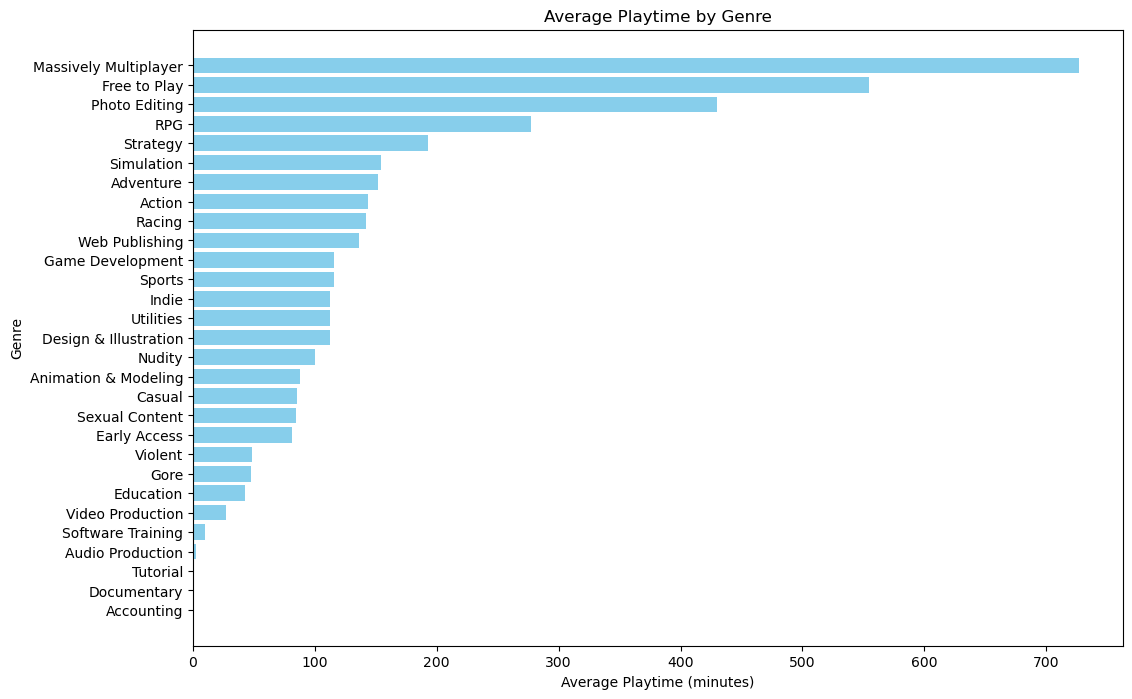




Linear Regression - average_playtime
Mean Squared Error: 10267537.91052727
R2 Score: 0.01513372368793875


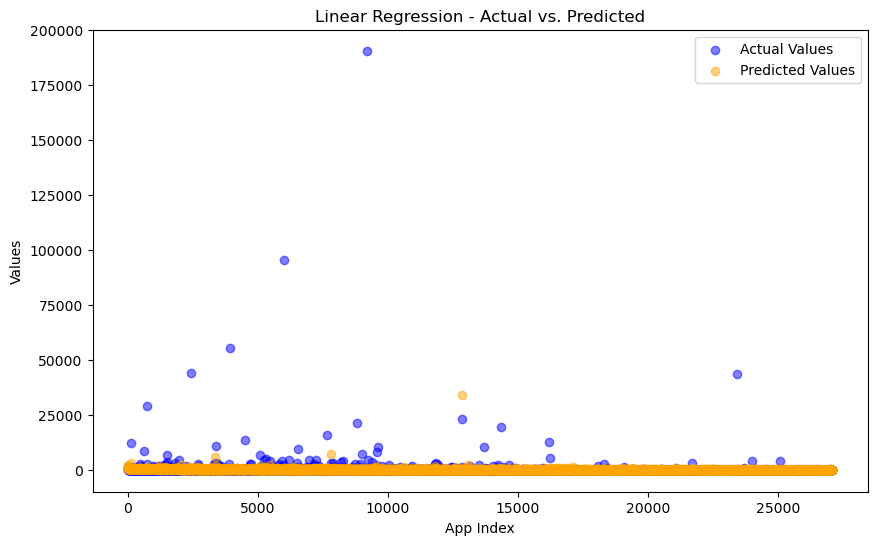

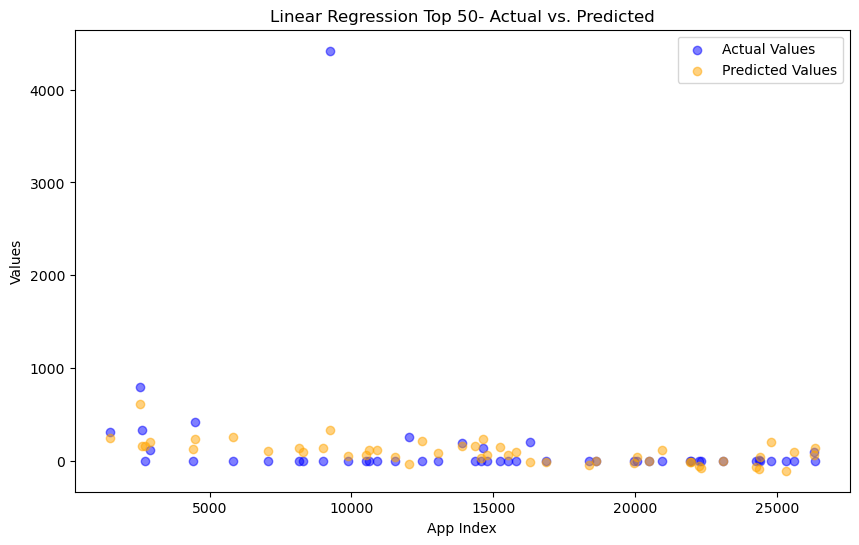

Linear Regression - average_playtime
Mean Squared Error: 10270676.338291716
R2 Score: 0.014832684461906442


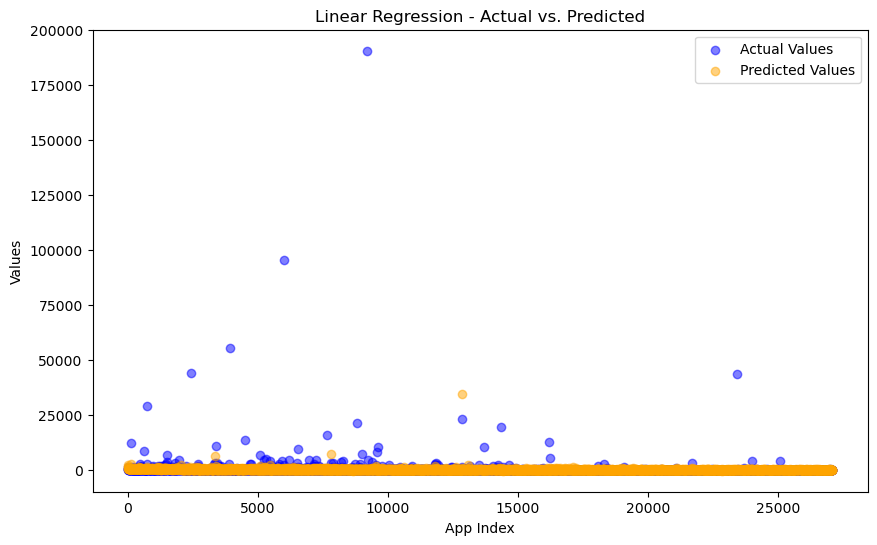

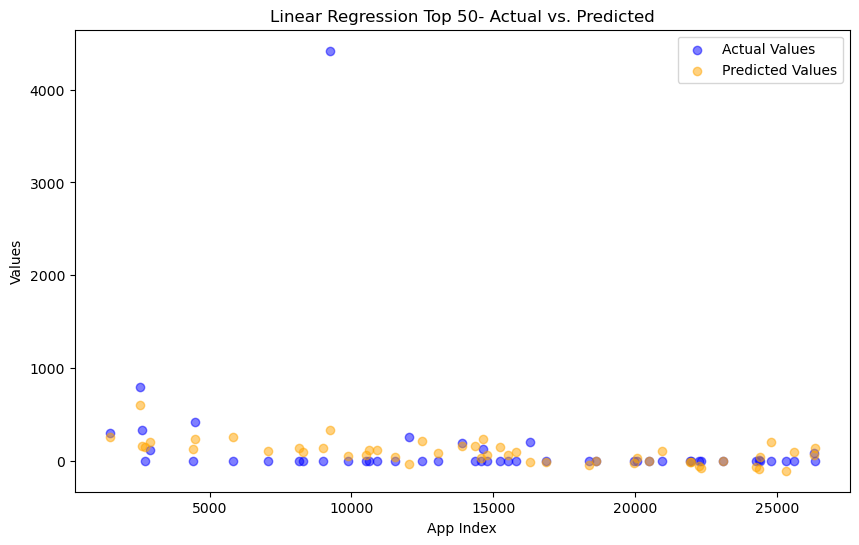

Linear Regression - average_playtime
Mean Squared Error: 10272236.999720955
R2 Score: 0.014682985203545496


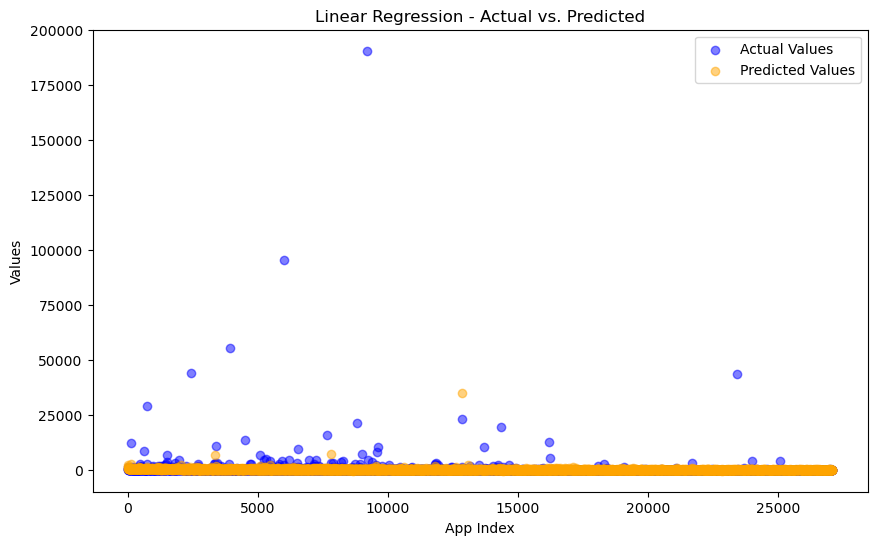

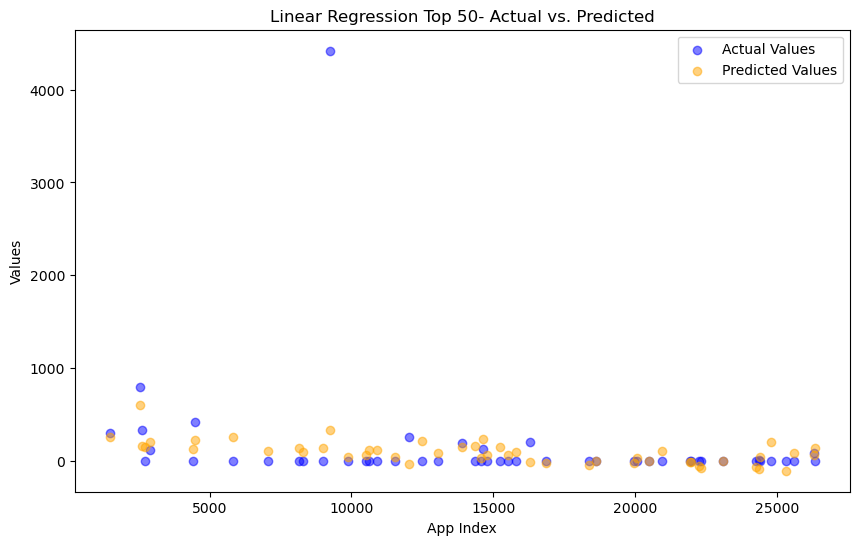

After emsemble learning


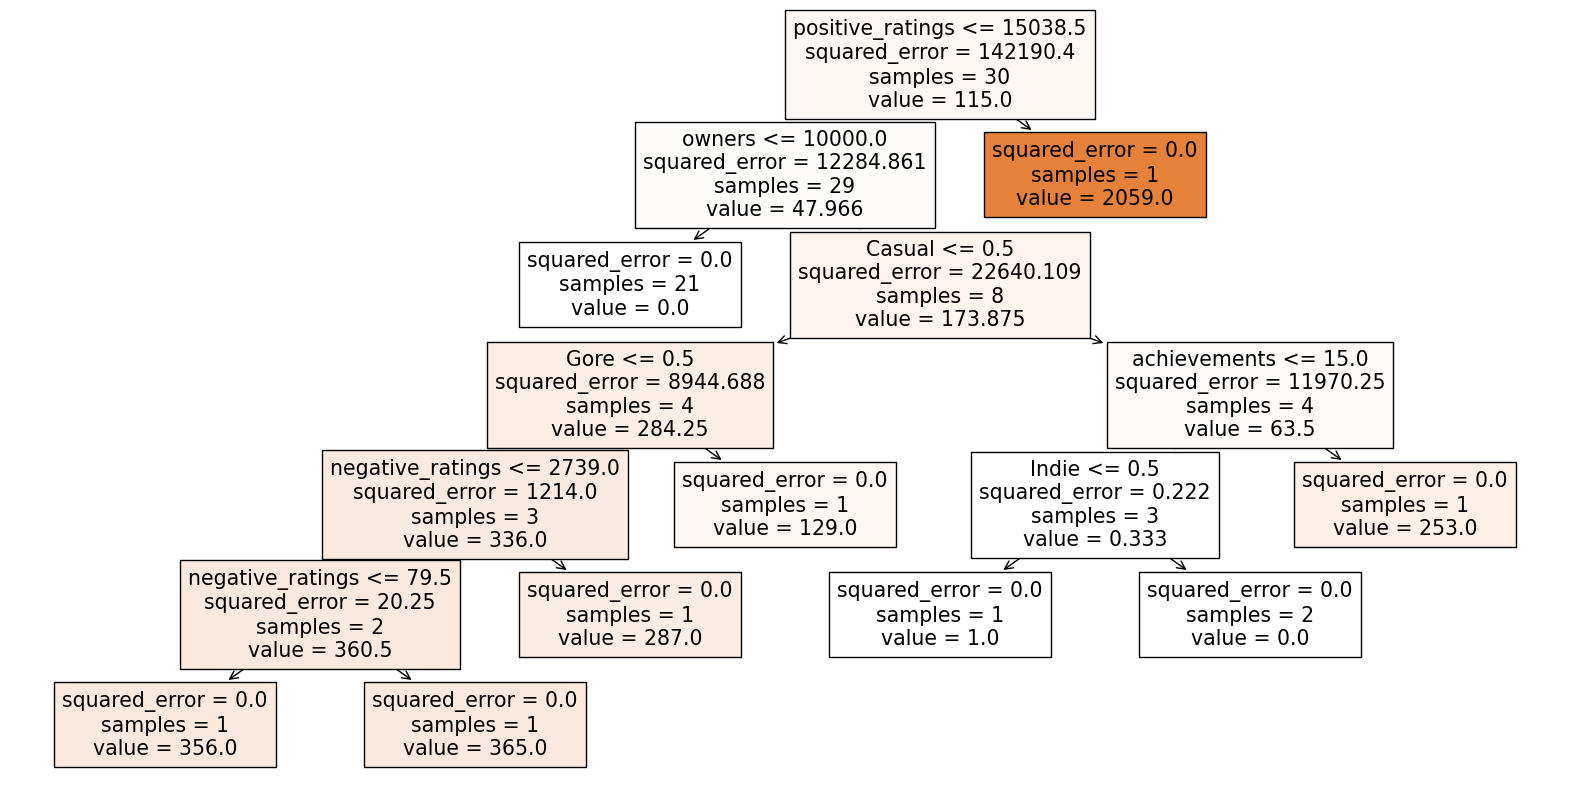

Mean Squared Error (MSE): 3266228.7171362606
Mean Absolute Error (MAE): 160.19496546374617
R-squared (R^2): 0.021556979425544465


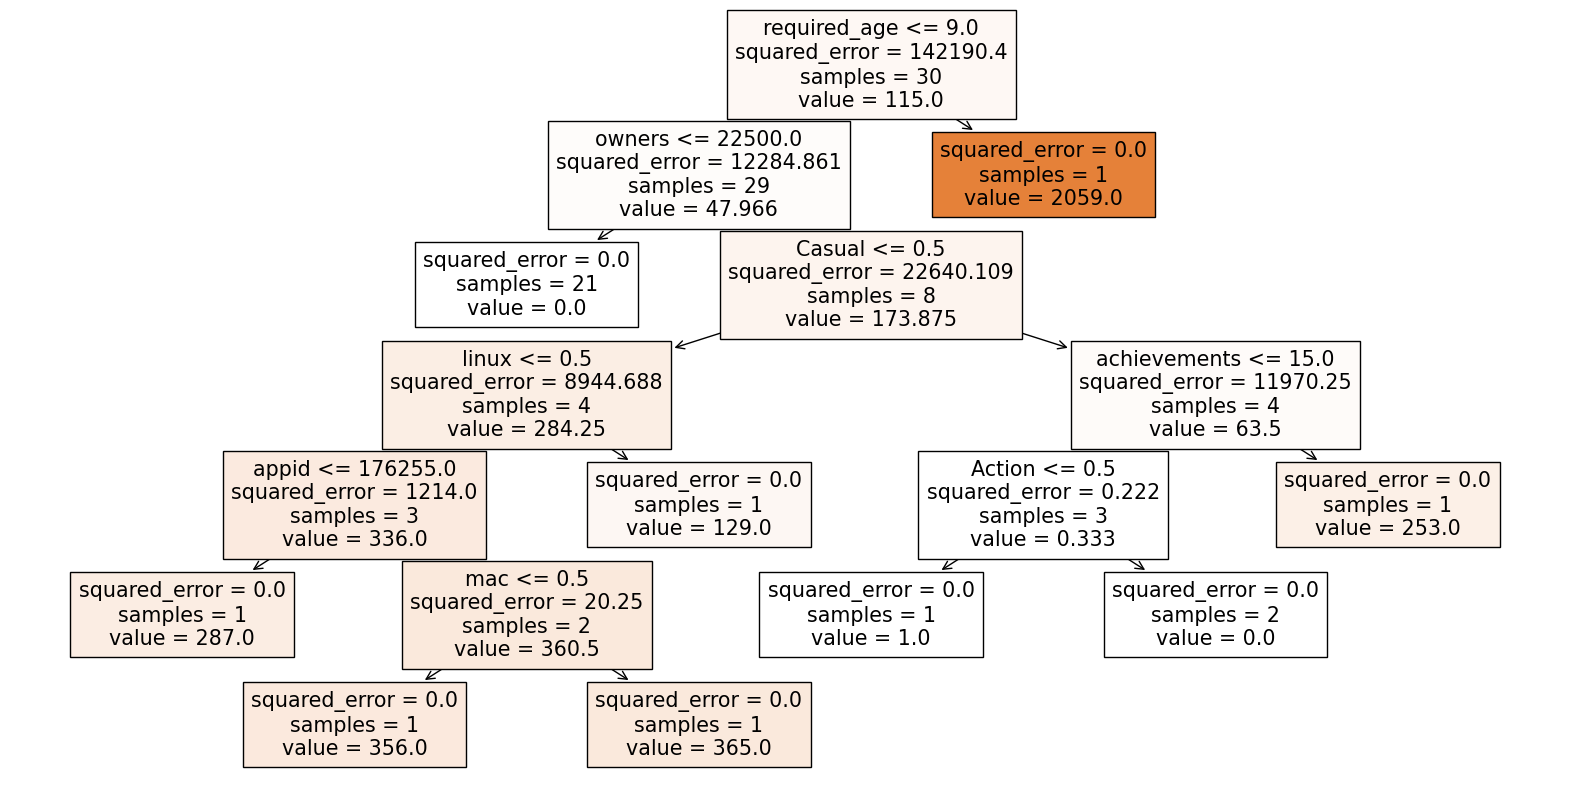

Mean Squared Error (MSE): 3278302.9848509585
Mean Absolute Error (MAE): 161.84609389428581
R-squared (R^2): 0.017939969106575804


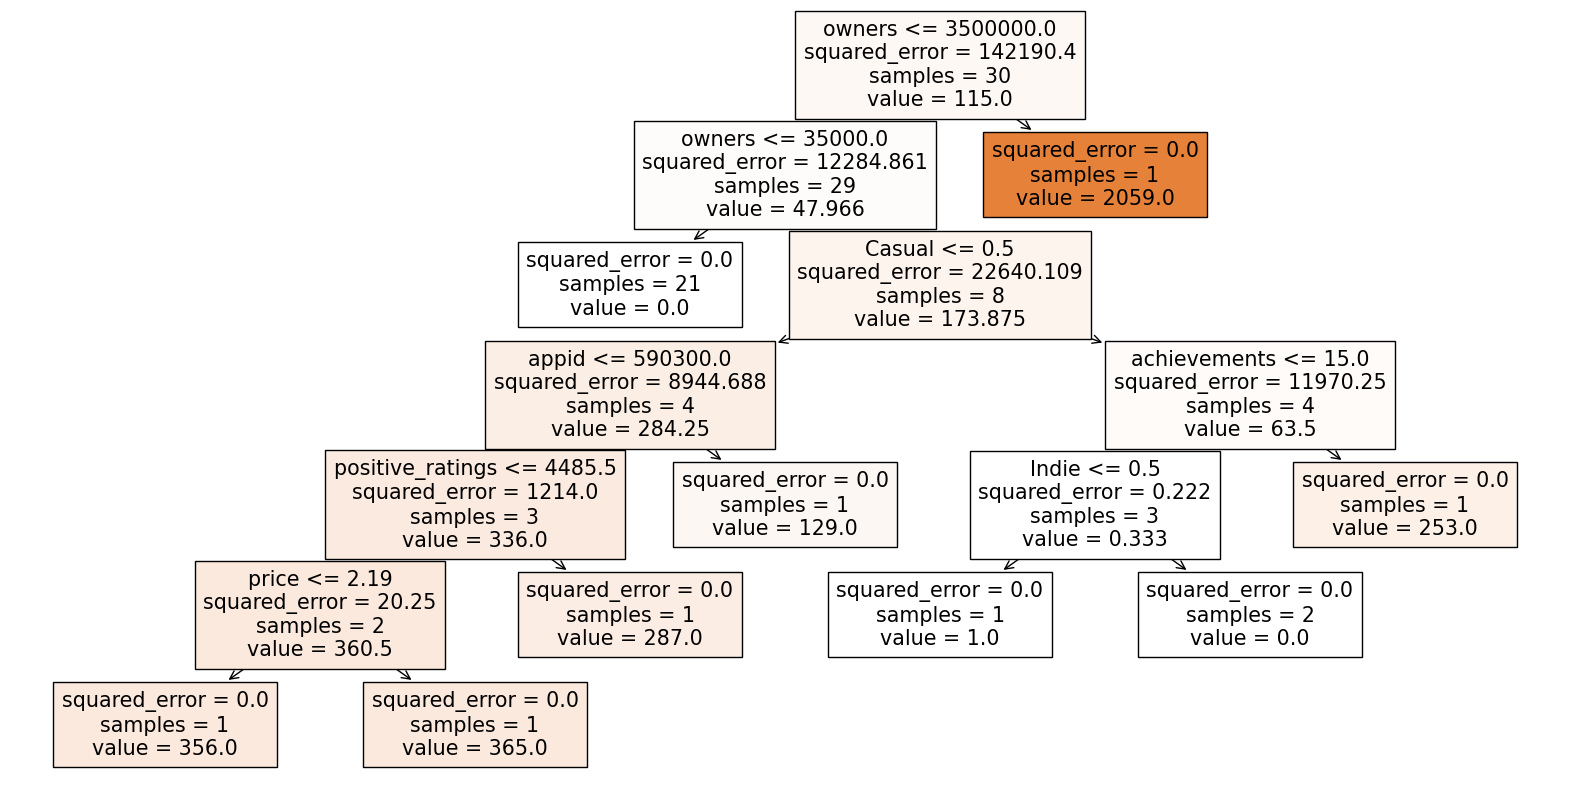

Mean Squared Error (MSE): 3275520.5504587595
Mean Absolute Error (MAE): 156.12567872049644
R-squared (R^2): 0.01877348498896647
hyperparameter tuning


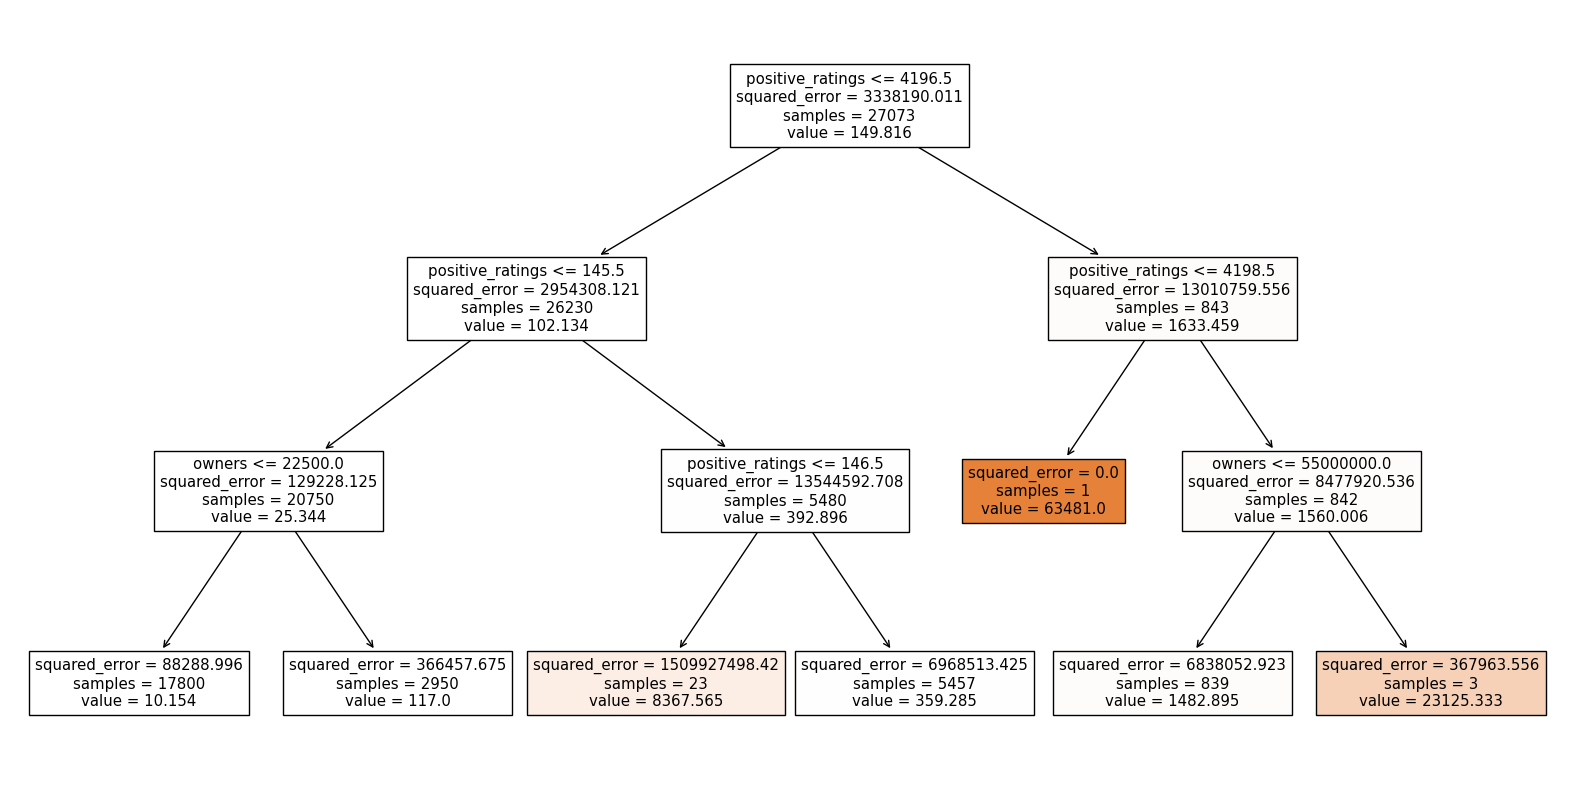

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Regressor with Hyperparameters
Mean Squared Error (MSE): 2997315.9527053535
Mean Absolute Error (MAE): 183.86552033122342
R-squared (R^2): 0.10211343774102222
Find the top five and best combination based on R squared
Linear regression with min owners data
Ensemble Learning with min owners data
Ensemble Learning with average owners data
Ensemble Learning with max owners data
DecisionTreeRegressor with hyperparameters grid with average owners data
Linear Regression - average_playtime
Mean Squared Error: 10267537.91052727
R2 Score: 0.01513372368793875


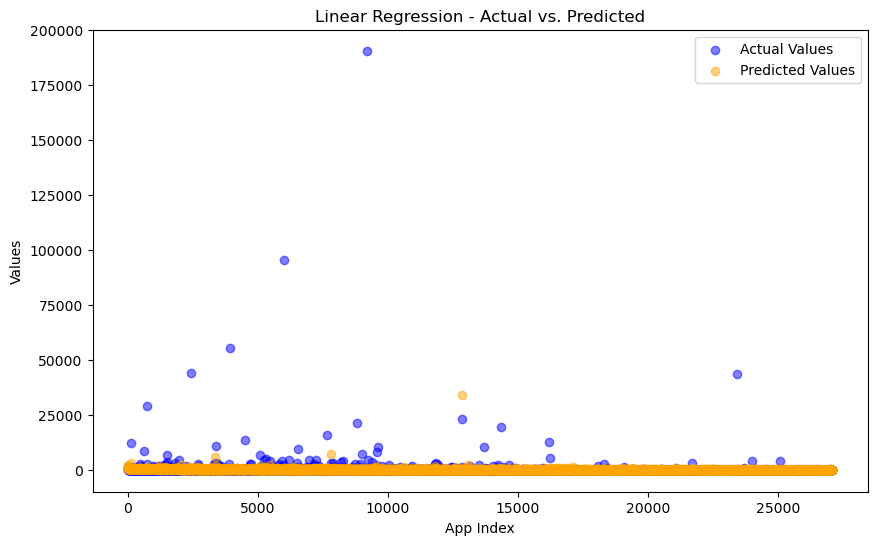

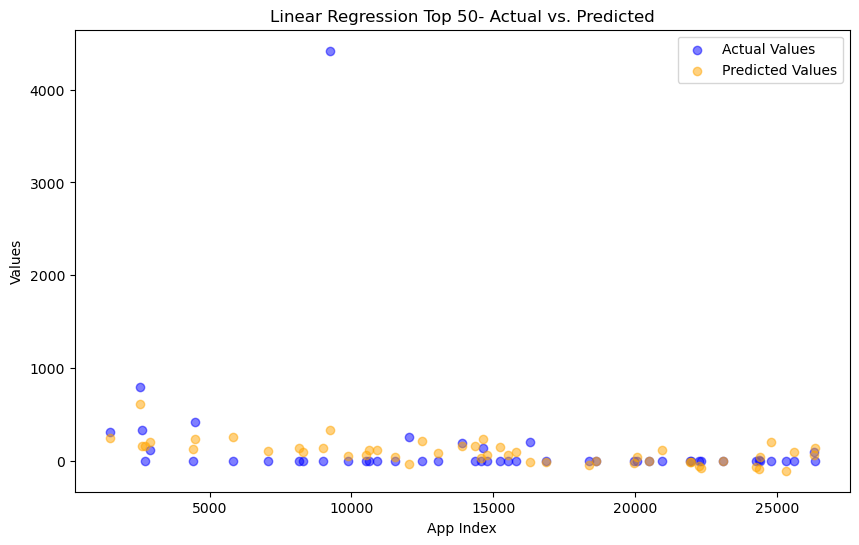

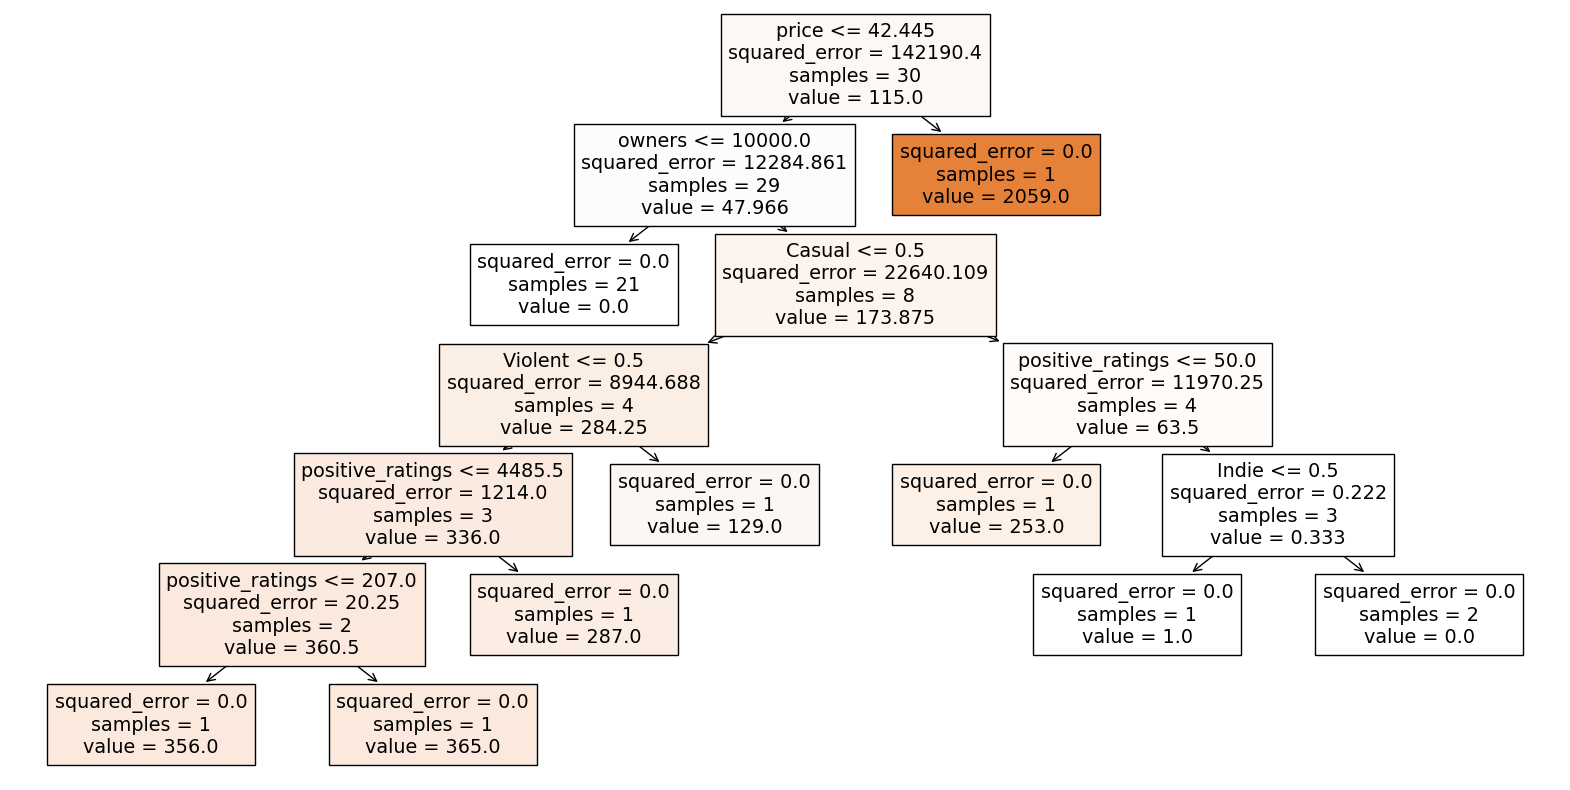

Mean Squared Error (MSE): 3269031.5991803636
Mean Absolute Error (MAE): 154.3342555313412
R-squared (R^2): 0.020717338172267286


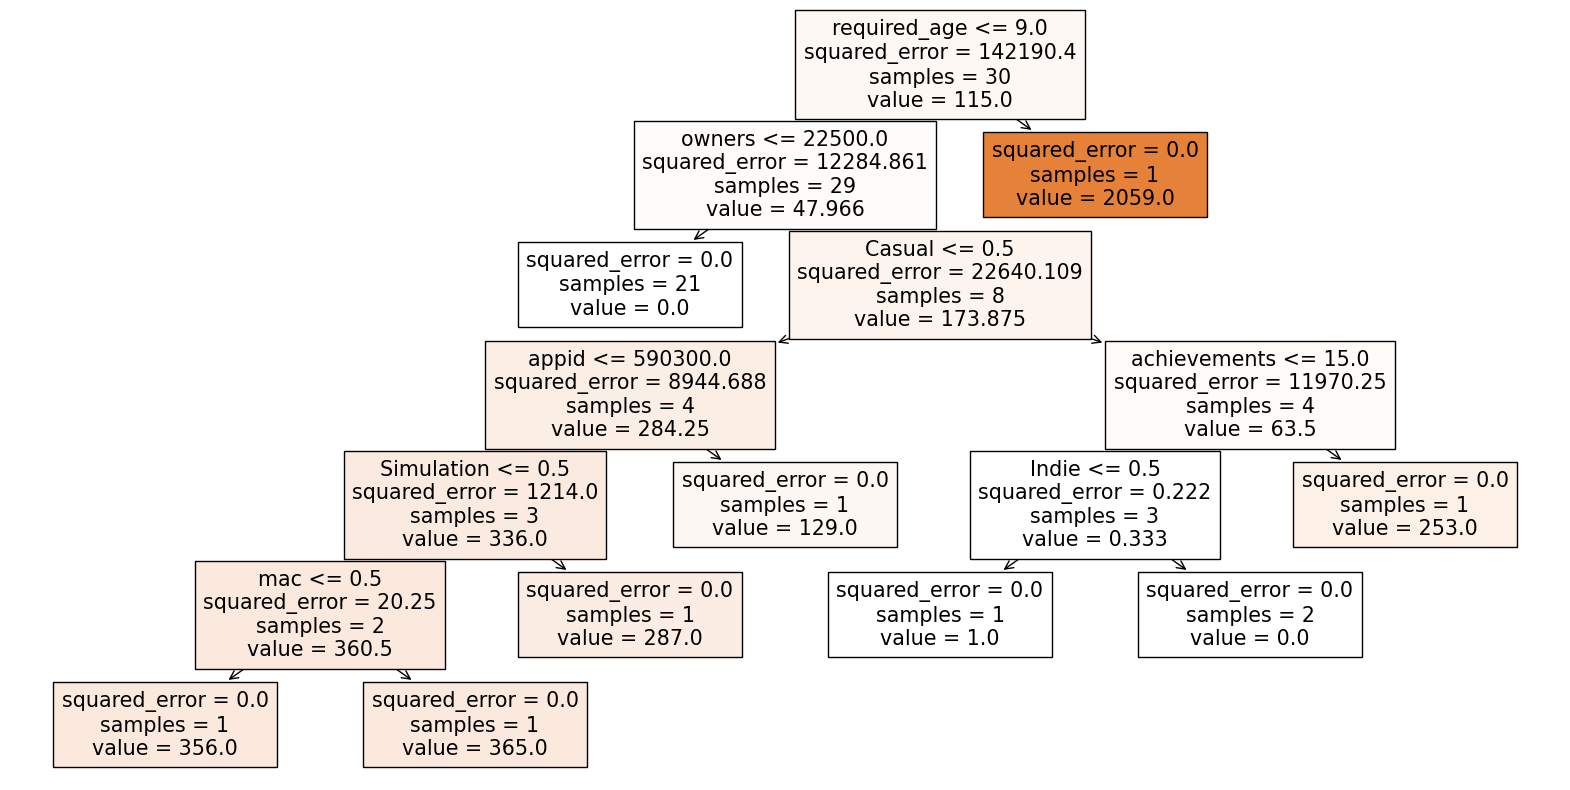

Mean Squared Error (MSE): 3270180.265616297
Mean Absolute Error (MAE): 163.94261071916668
R-squared (R^2): 0.020373239594200676


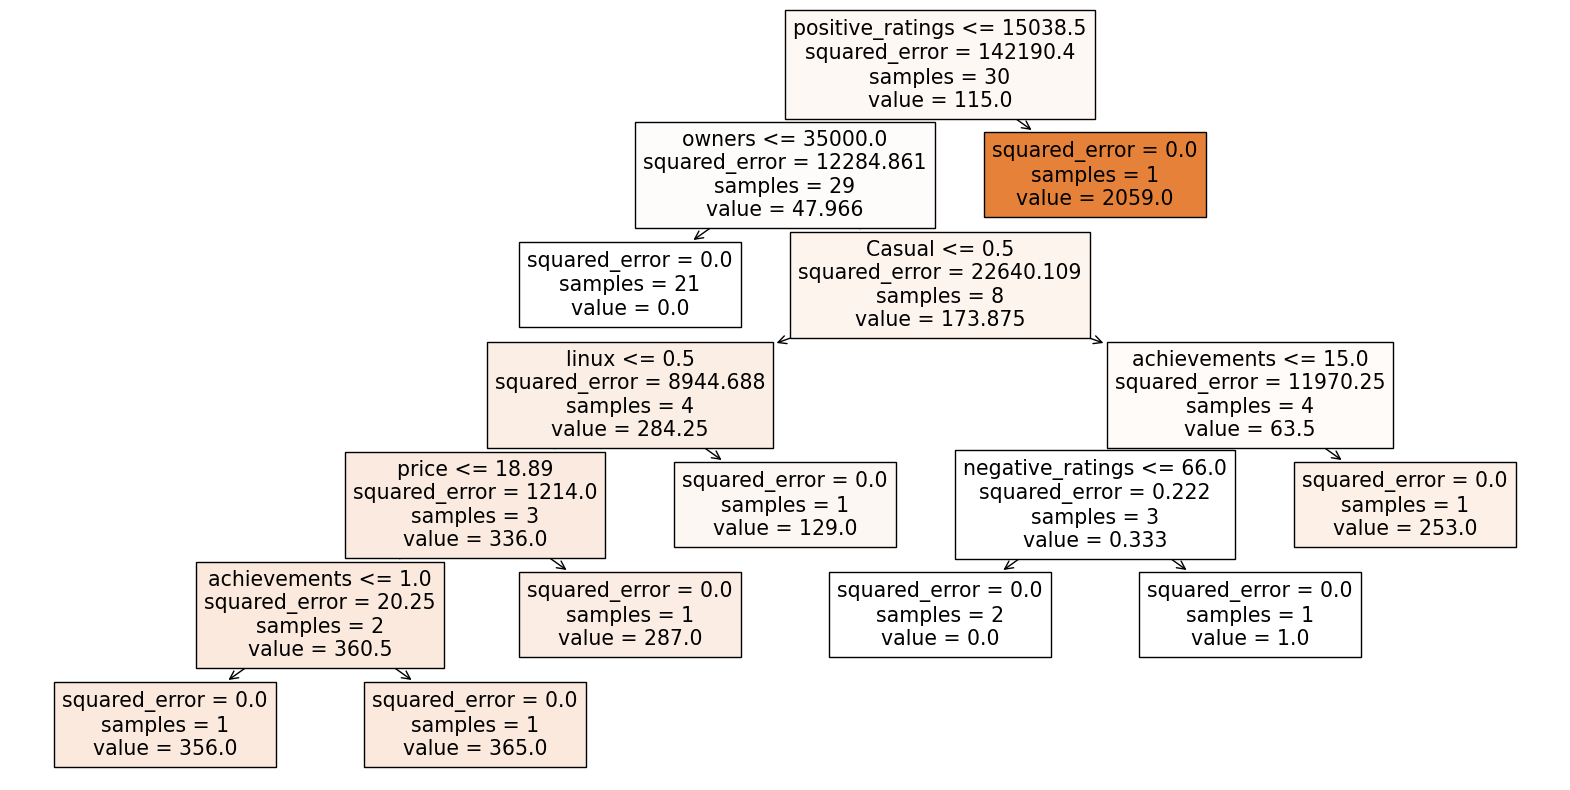

Mean Squared Error (MSE): 3264965.57762494
Mean Absolute Error (MAE): 157.2601410999889
R-squared (R^2): 0.02193536996273482


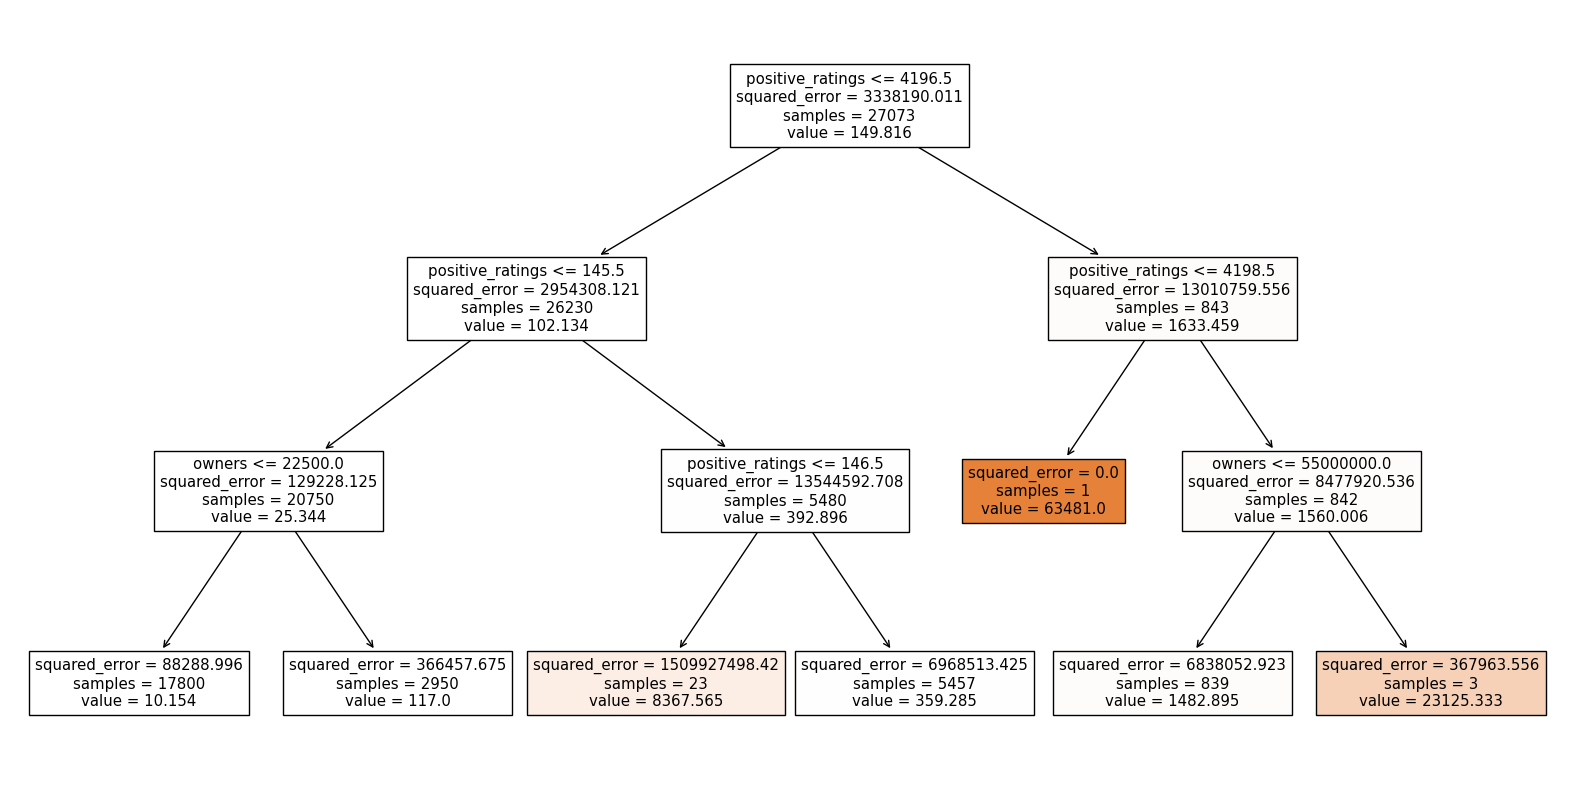

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 8}
Decision Tree Regressor with Hyperparameters
Mean Squared Error (MSE): 2997315.9527053535
Mean Absolute Error (MAE): 183.86552033122342
R-squared (R^2): 0.10211343774102222


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Read File
df = pd.read_csv('steam.csv')


"""


Data inspection


"""

print('Data inspection')
print(df.info())
print(df.isnull().sum())


"""
Data PreProcessing
"""
print('\n\n\nData PreProcessing')
# If the publisher is missing, replace null with 'No_Publisher'
df['publisher'] = df['publisher'].fillna('No_Publisher')

# However, appid 881910 has neither developer nor publisher
# It seems to be an incorrect entry, so drop it
df = df.dropna(subset=['developer'])

print('\n\nAfter processing Null\n')
print(df.isnull().sum())
print('\n\n')


# 1. Dataset with the minimum value in the 'owners' range

def min_value_in_range(x):
    # Split the string based on '-' and extract the minimum value
    range_values = x.split('-')
    return int(range_values[0])

# Change the 'owners' column values to the minimum value in the range
owners_min_data = df.copy()
owners_min_data['owners'] = owners_min_data['owners'].apply(min_value_in_range)


# 1. Dataset with the average value in the 'owners' range

def avg_value_in_range(x):
    # Split the string based on '-' and extract the values
    range_values = x.split('-')
    # Return the average of the extracted values
    return (int(range_values[0]) + int(range_values[1])) / 2

# Change the 'owners' column values to the average value in the range
owners_avg_data = df.copy()
owners_avg_data['owners'] = owners_avg_data['owners'].apply(avg_value_in_range)


# 1. Dataset with the maximum value in the 'owners' range

def max_value_in_range(x):
    # Split the string based on '-' and extract the maximum value
    range_values = x.split('-')
    # Return the second value (maximum) from the extracted values
    return int(range_values[1])

# Change the 'owners' column values to the maximum value in the range
owners_max_data = df.copy()
owners_max_data['owners'] = owners_max_data['owners'].apply(max_value_in_range)


# Seperate Data with Genres and Platforms

print("\n\n")
def seperate(d):
    """
    Separate genres and platforms by splitting with a semicolon.
    
    Args:
    - d (DataFrame): Input DataFrame containing 'genres' and 'platforms' columns.
    
    Returns:
    - DataFrame: Modified DataFrame with one-hot encoded genres and platforms.
    """
    d['genres'] = d['genres'].apply(lambda x: x.split(';'))  # Split genres by semicolon
    d['platforms'] = d['platforms'].apply(lambda x: x.split(';'))  # Split platforms by semicolon

    # One-hot Encoding using MultiLabelBinarizer
    mlb_genres = MultiLabelBinarizer()
    mlb_platforms = MultiLabelBinarizer()

    genres_encoded = mlb_genres.fit_transform(d['genres'])
    platforms_encoded = mlb_platforms.fit_transform(d['platforms'])

    # Convert One-hot Encoding results to DataFrame
    genres_df = pd.DataFrame(genres_encoded, columns=mlb_genres.classes_)
    platforms_df = pd.DataFrame(platforms_encoded, columns=mlb_platforms.classes_)

    # Add encoded data to the DataFrame
    d = d.drop(['genres', 'platforms'], axis=1)
    d = pd.concat([d, genres_df, platforms_df], axis=1)

    return d



#Seperate Data With Genres

print("\n\n")
steam_data = df.copy()

# Converts the string in the 'genres' property to a list by splitting it based on a semicolon (';').
steam_data['genres_list'] = steam_data['genres'].str.split(';')

# Expand the 'genres' property converted to list form into individual rows.
genres_exploded = steam_data.explode('genres_list')

# Calculate the average play time for each genre.
genre_playtime = genres_exploded.groupby('genres_list')['average_playtime'].mean().reset_index()

# Sort by average play time.
genre_playtime_sorted = genre_playtime.sort_values(by='average_playtime', ascending=False)

print('\n\n')
print("Average Playtime by Genre:")
print(genre_playtime_sorted)

plt.figure(figsize=(12, 8))
plt.barh(genre_playtime_sorted['genres_list'], genre_playtime_sorted['average_playtime'], color='skyblue')
plt.xlabel('Average Playtime (minutes)')
plt.ylabel('Genre')
plt.title('Average Playtime by Genre')
plt.gca().invert_yaxis()  # Show genres in ascending order
plt.show()



# Separate Data with Genres and Platforms

print("\n\n")

def separate(d):
    # Split genres and platforms by ';'
    d['genres'] = d['genres'].apply(lambda x: x.split(';'))
    d['platforms'] = d['platforms'].apply(lambda x: x.split(';'))

    # Use MultiLabelBinarizer for One-hot Encoding
    mlb_genres = MultiLabelBinarizer()
    mlb_platforms = MultiLabelBinarizer()
    # find transform
    genres_encoded = mlb_genres.fit_transform(d['genres'])
    platforms_encoded = mlb_platforms.fit_transform(d['platforms'])

    # Convert One-hot Encoding results to DataFrames
    genres_df = pd.DataFrame(genres_encoded, columns=mlb_genres.classes_)
    platforms_df = pd.DataFrame(platforms_encoded, columns=mlb_platforms.classes_)

    # Drop original 'genres' and 'platforms' columns and add encoded data
    d = d.drop(['genres', 'platforms'], axis=1)
    # concat d and genres_df and platforms_df
    d = pd.concat([d, genres_df, platforms_df], axis=1)

    return d




# 3 dataset to Test
owners_min_data = seperate(owners_min_data)
owners_avg_data = seperate(owners_avg_data)
owners_max_data = seperate(owners_max_data)


"""


Data Analysis and Evaluation


"""

def train_and_evaluate(data_input, target_column):
    """
    Trains a linear regression model on the given data and evaluates its performance.

    Args:
    - data_input (DataFrame): The input DataFrame containing the data.
    - target_column (str): The name of the target column.
    """
    data = data_input.copy()

    # Remove object columns
    X = data.select_dtypes(exclude=['object']).drop(columns=[target_column])
    y = data[target_column].astype(float)

    # Remove 'medianplaytime' column if target is 'average_playtime'
    if target_column == 'average_playtime':
        data.drop(columns=['median_playtime'], inplace=True)
    # Remove 'average_playtime' column if target is 'medianplaytime'
    elif target_column == 'median_playtime':
        data.drop(columns=['average_playtime'], inplace=True)

    # Drop rows with NaN values
    data.dropna(inplace=True)
    X = data.select_dtypes(exclude=['object']).drop(columns=[target_column])
    y = data[target_column].astype(float)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    mse_lin = mean_squared_error(y_test, y_pred_lin)
    r2_lin = r2_score(y_test, y_pred_lin)
    print(f"Linear Regression - {target_column}")
    print("Mean Squared Error:", mse_lin)
    print("R2 Score:", r2_lin)

    # Plot Linear Regression results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test.index, y_test, color='blue', label='Actual Values', alpha=0.5)
    plt.scatter(X_test.index, y_pred_lin, color='orange', label='Predicted Values', alpha=0.5)
    plt.xlabel('App Index')
    plt.ylabel('Values')
    plt.legend()
    plt.title('Linear Regression - Actual vs. Predicted')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test.index[:50], y_test[:50], color='blue', label='Actual Values', alpha=0.5)
    plt.scatter(X_test.index[:50], y_pred_lin[:50], color='orange', label='Predicted Values', alpha=0.5)
    plt.xlabel('App Index')
    plt.ylabel('Values')
    plt.legend()
    plt.title('Linear Regression Top 50- Actual vs. Predicted')
    plt.show()




    return mse_lin, r2_lin



    # Predict with new data if provided
    if new_data is not None:        
        X_new = new_data.select_dtypes(exclude=['object'])
        y_pred_new_lin = lin_reg.predict(X_new)
        y_pred_new_tree = tree_reg.predict(X_new)
        print("\nPredictions for New Data:")
        print("Linear Regression:", y_pred_new_lin)
        print("Decision Tree Regressor:", y_pred_new_tree)

    return mse_lin, r2_lin


def ensemble_decision_tree(data_input, target_column, new_data=None):
    # Make a copy of the input data
    data = data_input.copy()
    # Exclude object type columns
    data = data.select_dtypes(exclude=['object'])

    # Remove 'median_playtime' column if the target is 'average_playtime'
    if target_column == 'average_playtime':
        data.drop(columns=['median_playtime'], inplace=True)
    # Remove 'average_playtime' column if the target is 'median_playtime'
    elif target_column == 'median_playtime':
        data.drop(columns=['average_playtime'], inplace=True)

    # Drop rows with NaN values
    data.dropna(inplace=True)

    # Remove object columns from the test dataset
    X_test = data.drop(columns=[target_column])
    y_test = data[target_column].astype(float)

    iteration = 10  # Number of iterations for bootstrap sampling

    # Create 10 bootstrap samples of 30 records each for training
    train_datasets = [resample(data, n_samples=30, random_state=i) for i in range(iteration)]

    # Initialize an array to store predictions from each bootstrap sample
    predictions = np.zeros((X_test.shape[0], iteration), dtype=int)

    # Iterate over each bootstrap sample
    for i in range(iteration):
        X_train = train_datasets[i].drop(columns=[target_column])  # Features for training
        y_train = train_datasets[i][target_column].astype(float)  # Target for training
        X_train = X_train.reindex(columns=X_train.columns, fill_value=0)  # Reindexing columns with 0s if not present

        # Initialize a Decision Tree Regressor model
        dt = DecisionTreeRegressor()
        # Fit the model to the training data
        dt.fit(X_train, y_train)
        # Make predictions on the test data
        predictions[:, i] = dt.predict(X_test)

    # Ensemble predictions by taking the mean across all iterations
    final_predictions = np.mean(predictions, axis=1)

    # Actual target values (real data)
    y_true = y_test.copy()

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_true, final_predictions)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_true, final_predictions)

    # Calculate R-squared (Coefficient of Determination)
    r2 = r2_score(y_true, final_predictions)

    # Plot the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(dt, feature_names=X_test.columns.tolist(), filled=True)
    plt.show()

    # Print the evaluation results
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R^2):", r2)


    
    
from sklearn.model_selection import GridSearchCV

def ensemble_decision_tree_hyperparameter_tuning(data_input, target_column, new_data=None):
    # Make a copy of the input data
    data = data_input.copy()
    # Exclude object type columns
    data = data.select_dtypes(exclude=['object'])

    # Remove 'median_playtime' column if the target is 'average_playtime'
    if target_column == 'average_playtime':
        data.drop(columns=['median_playtime'], inplace=True)
    # Remove 'average_playtime' column if the target is 'median_playtime'
    elif target_column == 'median_playtime':
        data.drop(columns=['average_playtime'], inplace=True)

    # Drop rows with NaN values
    data.dropna(inplace=True)

    # Features and target columns
    X = data.drop(columns=[target_column])
    y = data[target_column].astype(float)

    # Define the hyperparameters grid for DecisionTreeRegressor
    param_dist = {
        'max_depth': randint(3, 15),  # Randomly select max_depth from 5 to 20
        'min_samples_split': randint(2, 10),  # Randomly select min_samples_split from 2 to 10
        'min_samples_leaf': randint(1, 5)  # Randomly select min_samples_leaf from 1 to 5
    }

    # Initialize the DecisionTreeRegressor
    dt = DecisionTreeRegressor()

    # Perform Randomized Search Cross Validation
    random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                               random_state=42)
    # The base estimator, Dictionary containing parameters, Number of parameter settings that are sampled, Cross-validation splitting strategy,
    # Scoring method to evaluate the predictions, Controls the random seed for reproducibility
    random_search.fit(X, y)

    # Get the best model after hyperparameter tuning
    best_dt = random_search.best_estimator_

    # Plot the decision tree with best hyperparameters
    plt.figure(figsize=(20, 10))
    plot_tree(best_dt, feature_names=X.columns.tolist(), filled=True)
    plt.show()
    # Print the best hyperparameters
    print("Best hyperparameters:", random_search.best_params_)

    # Use the best model for prediction
    final_predictions = best_dt.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, final_predictions)
    mae = mean_absolute_error(y, final_predictions)
    r2 = r2_score(y, final_predictions)
    
    # Print the evaluation results
    print("Decision Tree Regressor with Hyperparameters")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R^2):", r2)


    


new = owners_max_data.head(2).copy()
new.drop(columns=['median_playtime'], inplace=True)
new.drop(columns=['average_playtime'], inplace=True)


#Test With Average time
train_and_evaluate(owners_min_data, 'average_playtime')
train_and_evaluate(owners_avg_data, 'average_playtime')
train_and_evaluate(owners_max_data, 'average_playtime')

print("==================================")
print("After emsemble learning")
ensemble_decision_tree(owners_min_data, 'average_playtime')
ensemble_decision_tree(owners_avg_data, 'average_playtime')
ensemble_decision_tree(owners_max_data, 'average_playtime')

print("==================================")
print("hyperparameter tuning")
ensemble_decision_tree_hyperparameter_tuning(owners_avg_data, 'average_playtime')



print("Find the top five and best combination based on R squared")
print("Linear regression with min owners data")
print("Ensemble Learning with min owners data")
print("Ensemble Learning with average owners data")
print("Ensemble Learning with max owners data")
print("DecisionTreeRegressor with hyperparameters grid with average owners data")
train_and_evaluate(owners_min_data, 'average_playtime')
ensemble_decision_tree(owners_min_data, 'average_playtime')
ensemble_decision_tree(owners_avg_data, 'average_playtime')
ensemble_decision_tree(owners_max_data, 'average_playtime')
ensemble_decision_tree_hyperparameter_tuning(owners_avg_data, 'average_playtime')


